## 圆检测
cv2.HoughCircles(image, method, dp, minDist, circles, param1, param2, minRadius, maxRadius)

    image：输入图像 ,必须是8位的单通道灰度图像
    method：定义检测图像中圆的方法。目前唯一实现的方法是cv2.HOUGH_GRADIENT。
    dp：累加器分辨率与图像分辨率的反比。dp获取越大，累加器数组越小。
    minDist：检测到的圆的中心，（x,y）坐标之间的最小距离。如果minDist太小，则可能导致检测到多个相邻的圆。如果minDist太大，则可能导致很多圆检测不到。
    circles：输出结果，发现的圆信息
    param1：用于处理边缘检测的梯度值方法。
    param2：cv2.HOUGH_GRADIENT方法的累加器阈值。阈值越小，检测到的圈子越多。
    minRadius：最小半径

In [12]:

img.shape

(380, 500)

(380, 500, 3)
[[[ 73.5 297.5  56.1]
  [297.5 178.5  55. ]
  [410.5 183.5  52.8]
  [303.5 293.5  56.1]
  [184.5 177.5  56.1]
  [241.5  77.5  51.7]
  [350.5  79.5  56.1]
  [421.5 294.5  55. ]
  [ 74.5 189.5  59.4]
  [126.5  76.5  59.4]
  [188.5 291.5  57.2]]]
[[ 73.5 297.5  56.1]
 [297.5 178.5  55. ]
 [410.5 183.5  52.8]
 [303.5 293.5  56.1]
 [184.5 177.5  56.1]
 [241.5  77.5  51.7]
 [350.5  79.5  56.1]
 [421.5 294.5  55. ]
 [ 74.5 189.5  59.4]
 [126.5  76.5  59.4]
 [188.5 291.5  57.2]]
11
------------------------------
56.1
55.0
52.8
56.1
56.1
51.7
56.1
55.0
59.4
59.4
57.2


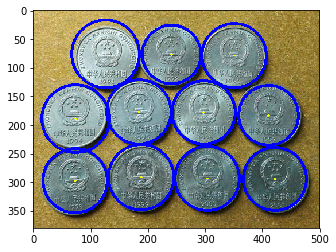

In [16]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
# 载入并显示图片
img = cv2.imread('coin_nums.png')
# 灰度化
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# 输出图像大小，方便根据图像大小调节minRadius和maxRadius
print(img.shape)
# 霍夫变换圆检测
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1,
                           100, param1=100, param2=30, minRadius=50, maxRadius=60)
# 输出返回值，方便查看类型
print(circles)
print(circles[0])
# 输出检测到圆的个数
print(len(circles[0]))

print('------------------------------')
# 根据检测到圆的信息，画出每一个圆
for circle in circles[0]:
    # 圆的基本信息
    print(circle[2])
    # 坐标行列
    x = int(circle[0])
    y = int(circle[1])
    # 半径
    r = int(circle[2])
    # 在原图用指定颜色标记出圆的位置
    img = cv2.circle(img, (x, y), r, (0, 0, 255), 3)
    img = cv2.circle(img, (x, y), 2, (255, 255, 0), -1)
# 显示新图像
# cv2.imshow('res', img)
plt.imshow(img)
# # 按任意键退出
# cv2.waitKey(0)
# cv2.destroyAllWindows()